<a href="https://colab.research.google.com/github/AabisZ/Deep-Learning-/blob/main/MInist_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import mnist

Hand Writing Detection model using mnist dataset with 98% accuracy

In [4]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
train_images[0] #data is vectorized already converted to 1 and 0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train_images[0].ndim

2

In [7]:
train_images[0].shape

(28, 28)

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
train_labels[0]

5

listing 2.2 The network architecture

In [11]:
#from 10.17 vid start

In [19]:
print('hello')

hello


In [21]:
#Dense means fully connected all nodes are connected form next and previous layers
#we are making dense/fully connesizected neural network
#input shape= size of input matrix syntax input_shape= (rows,col)
#first row input size is fixed
#activation function allows important data to move to next layer
#512 is a random no which rep how much output will be produced frm this layer
#in second layer we do not need to state input shape
#there are different types of activation function i.e 6

In [23]:
from tensorflow.keras import models 
from tensorflow.keras import layers
network =models.Sequential() #two models one sequential sectiond functional api
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))


In [26]:
#main focus during traing is accuracy
#matrics is confusion matrix'

listing 2.3 The compilation step

In [25]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Listing 2.4 Prep the image data

In [27]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [28]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     



---



Listing 2.5 prep the labels

In [29]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

batch = 60000 images will train in 128 128 batch

now network .fit to train the model
epoch is the no of iteration model will perform training 5 times
batch size as the name shows that the model will train in batch to prevent overload

In [30]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2596 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1046 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0687 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9890


now from the above result we can see that the accuracy is 98 % and loss is min

this is the accuracy during training/learning 

Now final is testing 

In [32]:
test_loss , test_acc =network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)
print('test_loss:',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9797
test_acc: 0.9797000288963318
test_loss: 0.06749305874109268


So ,form the above result we can see that the testing result shows 97% accuracy 

prediction

In [33]:
network.predict(test_images)[0]

array([1.2528936e-09, 1.2789524e-10, 1.1569401e-06, 1.9066563e-05,
       2.6437500e-12, 7.5428694e-09, 3.2365373e-14, 9.9997926e-01,
       1.6849601e-08, 4.4254159e-07], dtype=float32)

now visulising the data

In [34]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

print(train_images.ndim)

print(train_images.shape)

print(train_images.dtype)

3
(60000, 28, 28)
uint8


Listing 2.6 Displaying the fourth digit

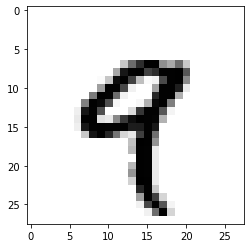

In [36]:
digit =train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [37]:
train_labels[4]

9